In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
from get_plot import get_plot
from scipy import sparse
from shapely.geometry import Point, Polygon, LineString
import pandas as pd


coords = json.load(open('coords.json'))
mpl.rcParams['figure.dpi'] = 120
# mpl.rcParams['savefig.pad_inches'] = 0


# This code is processed 
# I have manually processed every file using this format

In [2]:
gdf = gpd.read_file("D:/Users/xubil/OneDrive/Documents/Wildfires Data/FEUX_PROV_GPKG/FEUX_PROV.gpkg") # Fire file path

In [3]:
gdf

,geoc_fmj,exercice,origine,an_origine,perturb,an_perturb,part_str,met_at_str,superficie,shape_length,shape_area,geometry
0,"-542638,44+891642,20",2000,BR,2000,None,None,None,MAJP,77.9,7889.024636,768342.785601,"MULTIPOLYGON (((-542763.350 892040.430, -54276..."
1,"-643830,30+485452,45",2000,BR,2000,None,None,None,MAJP,1.2,631.224487,11965.221500,"MULTIPOLYGON (((-643768.670 485505.720, -64377..."
2,"+173868,24+697820,37",2000,BR,2000,None,None,None,MAJP,25.4,4564.586167,250635.701400,"MULTIPOLYGON (((173949.200 698215.090, 173951...."
3,"-602121,43+549209,88",2000,BR,2000,None,None,None,MAJP,1.1,534.353529,11160.402850,"MULTIPOLYGON (((-602131.160 549282.970, -60213..."
4,"+351239,52+722405,16",2000,BR,2000,None,None,None,MAJP,32.0,3335.534767,316263.936250,"MULTIPOLYGON (((351640.030 722974.410, 351642...."
...,...,...,...,...,...,...,...,...,...,...,...,...
73570,"-691832,66+1216486,89",1998,BR,1998,None,None,None,MAJP,0.2,352.224085,1826.785300,"MULTIPOLYGON (((-691906.100 1216435.400, -6919..."
73571,"-673527,97+1214035,62",1998,BR,1998,None,None,None,MAJP,7.6,1484.885249,74753.942050,"MULTIPOLYGON (((-673242.780 1214028.070, -6733..."
73572,"-681382,37+1216273,79",1998,BR,1998,None,None,None,MAJP,15.9,2522.818864,156355.716700,"MULTIPOLYGON (((-681066.150 1216265.010, -6811..."
73573,"-686238,39+1217078,07",1998,BR,1998,None,None,None,MAJP,19.6,2076.544818,192884.124750,"MULTIPOLYGON (((-686348.220 1216894.710, -6863..."


In [92]:
gdf2 = gdf.fillna('0')
gdf2 = gdf2[gdf2.an_origine.astype(int) >= 2013]
gdf2 = gdf2.to_crs(3857)
bnds = gdf2["geometry"].bounds

In [77]:
gdf3 = gpd.read_file("D:/Users/xubil/OneDrive/Documents/Wildfires Data/canards_sauv_mhb_2008_s_poly/canards_sauv_mhb_2008_s_poly.shp")

In [79]:
gdf2.crs

<Projected CRS: EPSG:32198>
Name: NAD83 / Quebec Lambert
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Canada - Quebec.
- bounds: (-79.85, 44.99, -57.1, 62.62)
Coordinate Operation:
- name: Quebec Lambert Projection
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [80]:
gdf3.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot: >

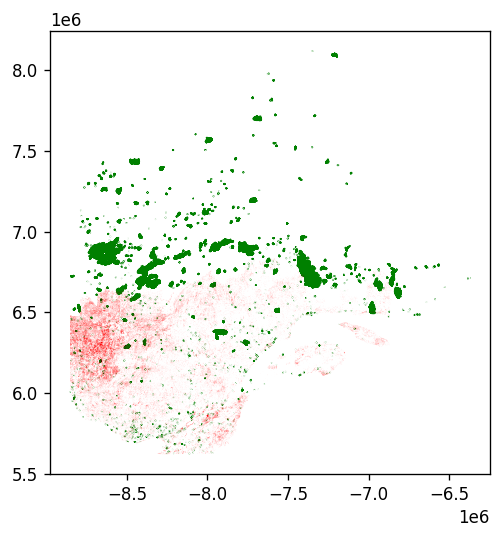

In [86]:
ax = gdf2.plot(color="palegreen", edgecolor="green")
gdf3.plot(ax=ax, color="red")

In [87]:
gdf2.total_bounds

array([-8851348.79997786,  5623859.92767095, -6372933.77880976,
        8119800.05040852])

In [88]:
xmin, xmax, ymin, ymax = int(coords["limits"]["xmin"]), int(coords["limits"]["xmax"]), int(coords["limits"]["ymin"]), int(coords["limits"]["ymax"])
x_total = 59700
y_total = 36400
x_ratio = x_total/(xmax-xmin)
y_ratio = y_total/(ymax-ymin)
chunk_x = (xmax-xmin)/100
chunk_y = (ymax-ymin)/100

In [89]:
gdf2.loc[gdf2['an_origine'] == '2020']

,geoc_fmj,exercice,origine,an_origine,perturb,an_perturb,part_str,met_at_str,superficie,shape_length,shape_area,geometry
27773,"+602504,47+911749,36",2020,BR,2020,0,0,0,MAJP,6.0,1599.866135,5.926589e+04,"MULTIPOLYGON (((-6641849.225 6779770.814, -664..."
27774,"+650696,17+793115,95",2020,BR,2020,0,0,0,MAJP,2.1,807.404613,2.048274e+04,"MULTIPOLYGON (((-6588873.540 6580172.170, -658..."
27775,"+601520,62+911018,71",2020,BR,2020,0,0,0,MAJP,109.8,9081.585945,1.082407e+06,"MULTIPOLYGON (((-6642278.528 6779256.962, -664..."
27776,"+601501,70+911618,33",2020,BR,2020,0,0,0,MAJP,1.0,357.933112,9.661569e+03,"MULTIPOLYGON (((-6643352.155 6779537.748, -664..."
27777,"+602209,61+912171,84",2020,BR,2020,0,0,0,MAJP,0.9,415.015115,8.890322e+03,"MULTIPOLYGON (((-6642021.576 6780220.151, -664..."
...,...,...,...,...,...,...,...,...,...,...,...,...
62860,"-180777,11+622390,05",2020,BR,2020,0,0,B3,TRIMSAT,1.9,1102.226408,1.856778e+04,"MULTIPOLYGON (((-7905186.588 6373280.248, -790..."
62861,"-181476,54+622320,39",2020,BR,2020,0,0,B3,TRIMSAT,0.5,736.444679,4.546597e+03,"MULTIPOLYGON (((-7906233.279 6373517.764, -790..."
62862,"-178465,00+622495,55",2020,BR,2020,0,0,B3,TRIMSAT,1.1,578.914360,1.083093e+04,"MULTIPOLYGON (((-7901579.016 6373671.624, -790..."
62863,"-188526,58+622635,13",2020,BR,2020,0,0,B3,TRIMSAT,3.0,1167.286771,2.957904e+04,"MULTIPOLYGON (((-7917413.496 6373184.082, -791..."


In [90]:
gdf2.an_origine.unique()

array(['2018', '2013', '2019', '2020', '2016', '2021', '2015', '2017',
       '2022', '2014'], dtype=object)

### Geopackage File Extraction per Fire

In [99]:
count = 0

fires = []

for idx, cur_row in gdf2.iterrows():
    # print("hi")
    print(idx)

    if (idx < 70544):
        continue

    y_factor = 10

    x_min, x_max, y_min, y_max = int(bnds["minx"][idx]), int(bnds["maxx"][idx]), int(bnds["miny"][idx]), int(bnds["maxy"][idx])
    # These coords only have 5 digits vs 7 for x and 6 digits vs 7 for y... or not let's manually fix this 
    
    
    # print(x_min, x_max, y_min, y_max)
    # # print(left_x_min, left_x_max,  top_y_min, top_y_max)
    # print(xmin, xmax, ymin, ymax)

    # if (count > 20):
    #     break
    # count+=1

    if (x_min < xmin or x_max > xmax or y_min < ymin or y_max > ymax):
        print("out of bounds")
        continue 

    fig, ax = plt.subplots(facecolor=(0, 0, 0, 0))
    gpd.GeoSeries(cur_row['geometry']).plot(ax=ax, color="white")
    ax.set_axis_off()
    ax.set_facecolor((0, 0, 0, 0))
    # Plot the fire into a sparse matrix 
    sparse_mat = sparse.csr_matrix((y_total, x_total)).tolil()
    # print(sparse_mat.shape)

    # We first render the required chunks

    left_x_min = xmin + (x_min-xmin) - ((x_min-xmin) % chunk_x)
    left_x_max = xmin + (x_max-xmin) - ((x_max-xmin) % chunk_x)
    top_y_min = ymin + (y_min-ymin) - ((y_min-ymin) % chunk_y)
    top_y_max = ymin + (y_max-ymin) - ((y_max-ymin) % chunk_y)

    # left_x_min /= 100
    # left_x_max /= 100
    # top_y_min /= y_factor
    # top_y_max /= y_factor

    # print((x_min-xmin))
    # print(chunk_x)
    # print((x_min-xmin) % chunk_x)
    # print(left_x_min, left_x_max,  top_y_min, top_y_max)

    for x in range(int((left_x_max - left_x_min)/chunk_x)+1):
        for y in range(int((top_y_min - top_y_max)/chunk_y)+1):
            ax.axis([
                left_x_min+x*chunk_x, 
                left_x_min+(x+1)*chunk_x, 
                top_y_min+y*chunk_y,
                top_y_min+(y+1)*chunk_y,
            ])

            fig.canvas.draw()

            X = np.array(fig.canvas.renderer.buffer_rgba())
            # X_final = np.zeros((len(X), len(X[0])))

            for row in range(108, 472):
                for col in range(95, 692):
                    # print(left_x_min+(x*chunk_x)*100)

                    # print(int(((top_y_min+(y*chunk_y))*10-ymin)*y_ratio)+col-108,int(((left_x_min+(x*chunk_x))*100-xmin)*x_ratio)+row-95)
                    sparse_mat[int(((top_y_min+(y*chunk_y))-ymin)*y_ratio)+row-108,int(((left_x_min+(x*chunk_x))-xmin)*x_ratio)+col-95] = (float(X[row][col][3]))/255.0
                    # X_final[row][col] = (float(X[row][col][3]))/255.0
            # X_final = X_final[108:472, 95:692]

            # print(X_final.shape)
    
    sparse_mat = sparse_mat.tocsr()

    sparse.save_npz("../fires/"+cur_row['an_origine']+"/"+str(idx)+".npz", sparse_mat) # File save path

    # fires.append(sparse_mat)
    del sparse_mat, fig, ax
    

    

97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117


C:\Users\xubil\AppData\Local\Temp\ipykernel_35040\2744083115.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(facecolor=(0, 0, 0, 0))


118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
260
261
262
263
264
265
266
267
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
473
474
475
476
477
478
479
480
481
482
483
484
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
674
out of bounds
675
676
677
678
679
680
681
682
683
684
685
686
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
897
898
899
900
901
902
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
99

### Verify if fires were extracted correctly

(36400, 59700)
[40059 40060 40061 40062 40063 40064]
(36400, 59700)
[27304 27305 27306 27307 27308 27309 27310 27311 27312 27313 27314 27315
 27316 27317 27318 27319 27320]
(36400, 59700)
[27610 27611 27612 27613 27614 27615 27616 27617 27618 27619 27620 27621
 27622 27623 27624 27625 27626 27627]
(36400, 59700)
[27299 27300 27301 27302 27303 27304 27305 27306]
(36400, 59700)
[27437 27438 27439 27440 27441 27442 27443 27444 27445 27446 27447 27448
 27449 27450]
(36400, 59700)
[27684 27685 27686 27687 27688 27689 27690 27691 27692 27693 27694 27695
 27696 27697 27698 27699 27700 27701 27702 27703]
(36400, 59700)
[57591 57592 57593 57594 57595 57596 57597 57598 57599 57600 57601 57602
 57603 57604 57605 57606 57607 57608 57609 57610 57611]
(36400, 59700)
[57629 57630 57631 57632 57633 57634 57635 57636 57637 57638 57639 57640
 57641 57642 57643 57644 57645 57646 57647 57648 57649 57650 57651 57652]
(36400, 59700)
[57601 57602 57603 57604 57605 57606 57607 57608 57609 57610 57611 57612
 5

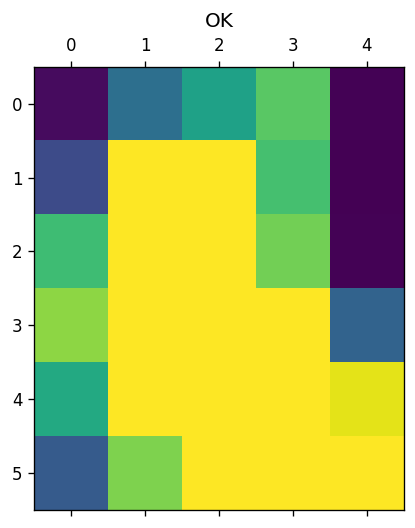

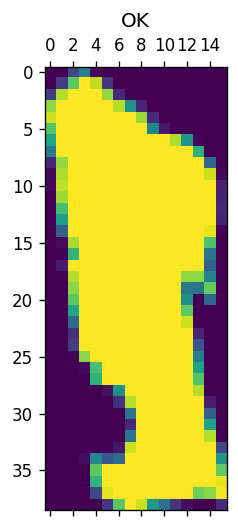

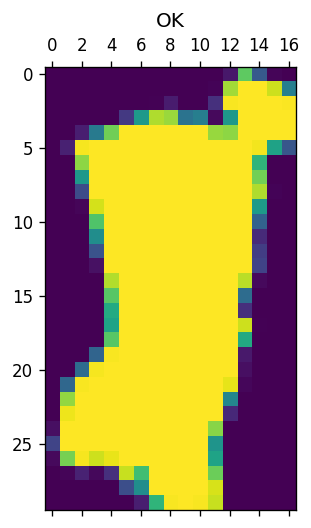

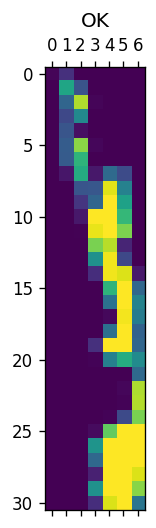

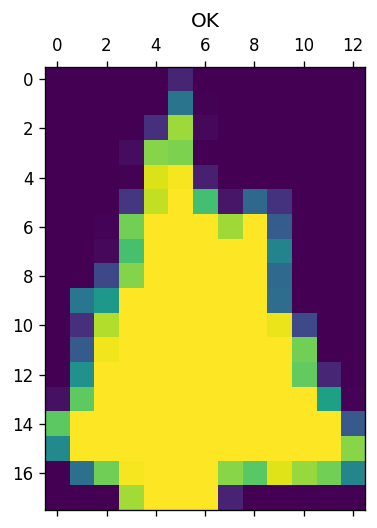

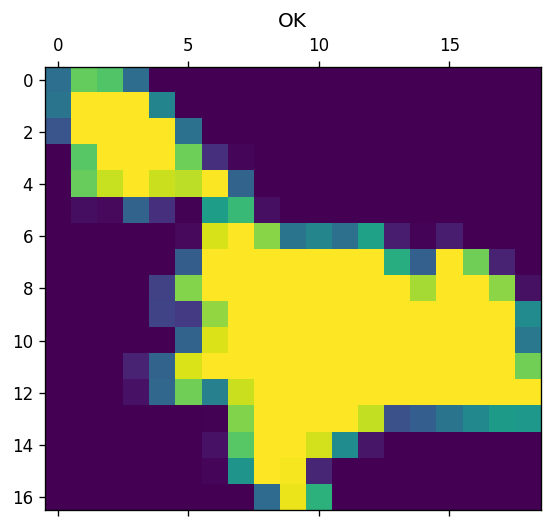

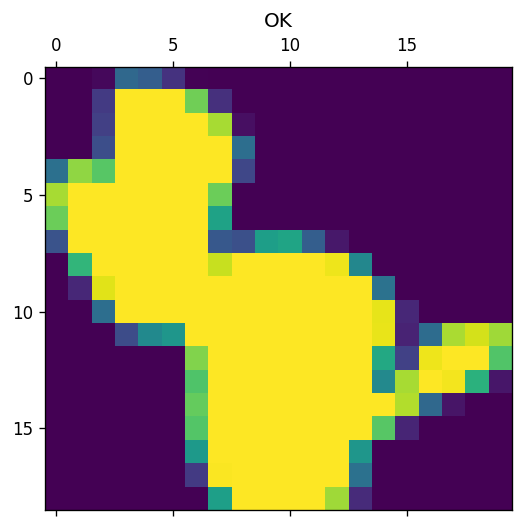

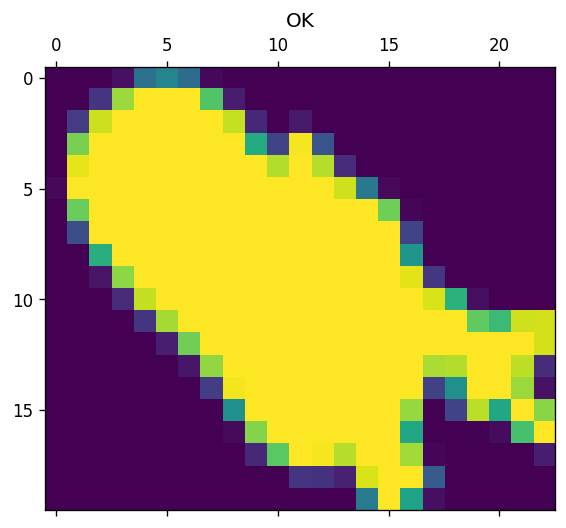

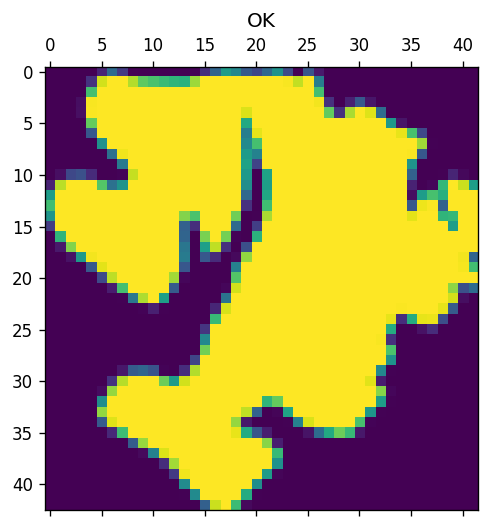

In [98]:
for fire in fires:
    data = fire.tocsr()
    print(data.shape)
    nnz_per_row  = fire.getnnz(axis=1)
    zoom = np.where(nnz_per_row > 0)[0]
    nnz_per_row_x  = fire.getnnz(axis=0)
    zoom_x = np.where(nnz_per_row_x > 0)[0]
    print(zoom_x)
    data = fire.tocsr()[zoom[0]:zoom[len(zoom)-1], zoom_x[0]:zoom_x[len(zoom_x)-1]]

    # N, M = data.shape
    # s, t = 400, 400           # decimation factors for y and x directions
    # T = sparse.csc_matrix((np.ones((M,)), np.arange(M), np.r_[np.arange(0, M, t), M]), (M, (M-1) // t + 1))
    # S = sparse.csr_matrix((np.ones((N,)), np.arange(N), np.r_[np.arange(0, N, s), N]), ((N-1) // s + 1, N))
    # result = S @ data @ T     # downsample by binning into s x t rectangles
    # result = result.todense() # ready for plotting
    

    figx, axX = plt.subplots()
    axX.set_title("OK")
    axX.matshow(data.todense())
    # axX.matshow(result)